# Sequential learning experiment

Student: Isabelle Melo

Hi guys, today we're gonna make another machine learning experiment, and this time about sequential learning!

Let's suppose I toss a coin 5 five with head probability equal to $\mu = 0.7$. Let's check what is the form of prior and posterior distributions generated by the interactive process. We're considering here the prior as a Beta with parameters $a$ and $b$ choosen in the following way:

$a=b=1$

$a=2=b$

Just a quick reminder that Beta distribuition is given by:

$B(\mu, a,b) = \dfrac{\Gamma(a+b)\mu^{a-1}(1-\mu)^{b-1}}{\Gamma(a)\Gamma(b)}$

Given the problem, we can set likelilhood function as Binomial function:

$Bin(m, N, \mu) = \binom{N}{m}\mu^{m}(a-\mu)^{N-m}$

Where N is size sample, and m denotes the number of observations $x=1$ (heads). The posterior can be obtained multiplying the beta prior by the binomial likelilhood and normalizing it, with general form:

$ p(\mu, m, l, a ,b) \propto \mu^{m+a-1} (1-\mu)^{l+b-1}$

With $l = N-m$, corresponding to the number of tails. Checking posterior form, it can be asserted that observing a data set of m observations of $x=1$ and l of $x=0$ has this effect of increasing the $a$ value by m and $b$ by l. Thus these parameters can be seen as effective numbers of observation! Going further, if we're dealing with a sequential experiment, the posterior can act as a prior in subsequent data in a Bayesian point of view. If we do this, a new observation of head implies and increment in the value $a$ by 1, whereas an observation of tail increments $b$ by 1. Don't forget it all depends on assumption of i.i.d data!
This might be useful in real-time learning with new data constantly arriving and a previous prediction must be made. 

Let's go to the experiment, then.



## Importing Bibs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from math import pow
from scipy.stats import bernoulli

## Functions

In [3]:
# prior beta

def beta(a, b, mu):
    '''let a and b be the hyperparameters wich control the distribuiton of parameter mu'''
    
    beta = (gamma(a+b)/(gamma(a)*gamma(b)))* pow(mu, a-1)*pow(1-mu,b-1)
    
    return beta



def looper(a,b):
    arr_mu = np.linspace(0, 1, num=100)
    n = 1
    for i in data:
        
        prioris = []
        posterioris = []
        
        if i==1:
            for m in arr_mu:
                prioris.append(beta(a,b,m))
                d = a + 1
                posterior = beta(d,b,m)
                posterioris.append(posterior)
            
            f, (ax1, ax2) = plt.subplots(1, 2)
            f.suptitle(f'Observation number {n}')
            ax1.plot(arr_mu, prioris)
            ax1.grid(True)
            ax1.set_title(f'Prior a={a},b={b}')
            ax1.set_xlabel('$\mu$')
            ax2.plot(arr_mu, posterioris)
            ax2.grid(True)
            ax2.set_title(f'Posterior a={d},b={b}')
            ax2.set_xlabel('$\mu$')
            d = d + 1
            a = a + 1
        else: 

            for m in arr_mu:
                prioris.append(beta(a,b,m))
                c = b + 1
                posterior = beta(a,c,m)
                posterioris.append(posterior)
            
            f, (ax1, ax2) = plt.subplots(1, 2)
            f.suptitle(f'Observation number {n}')
            ax1.plot(arr_mu, prioris)
            ax1.grid(True)
            ax1.set_title(f'Prior a={a}, b={b}')
            ax1.set_xlabel('$\mu$')
            ax2.plot(arr_mu, posterioris)
            ax2.grid(True)
            ax2.set_title(f'Posterior a={a},b={c}')
            ax2.set_xlabel('$\mu$')
            c = c + 1
            b = b+1
        n+=1

## Generating Data

Data is generated by Bernoulli distribuiton

In [4]:
# 5 trials

data = bernoulli.rvs(0.7, size = 5)
data

array([0, 1, 0, 0, 0])

## Experiment

The first we're gonna try is looper function for parameters $a=b=1$

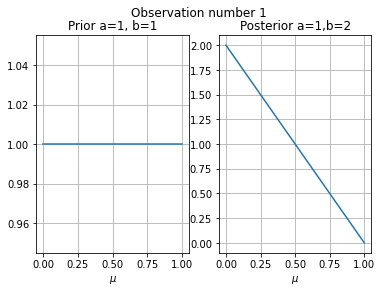

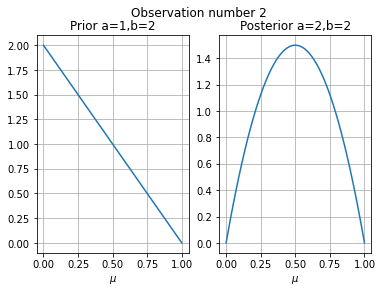

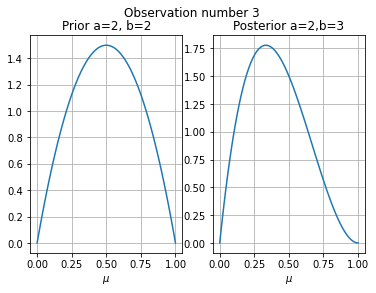

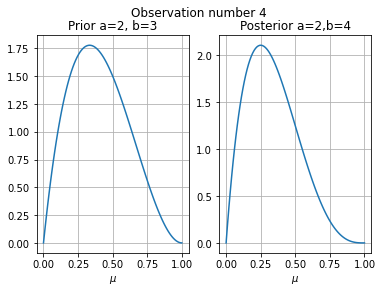

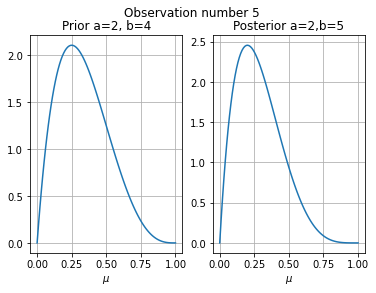

In [5]:
looper(1,1)

As we can see, as the number of observation increases the posterior distribuiton becomes more sharply peaked. Variance tends to zero as $a,b$ go to infinity. For the first prior\posterior, the corresponding graph is linear because using $a=b=1$ in out Beta function and posterior form, leads to a linear form. As we proceed with more observations, $a$ and $b$ values increase and distribuiton's shape has a non-linear form with variance getting smaller.

Now let's try for looper(2,2)

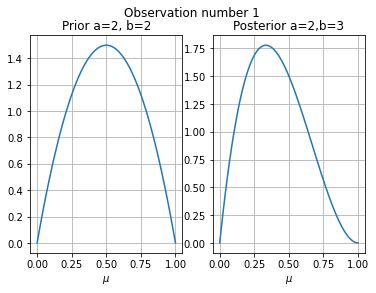

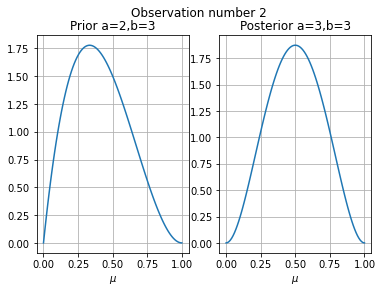

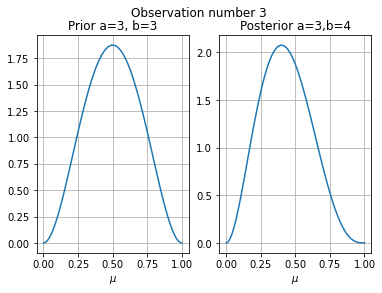

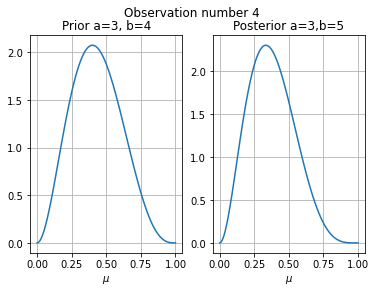

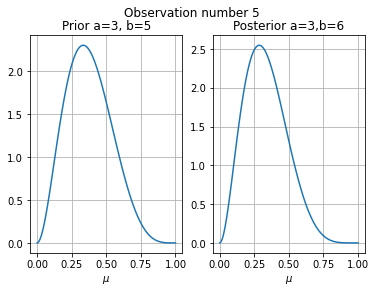

In [6]:
looper(2,2)

The prior\posterior starts with a non-linear form because of initializing parametrs $a$ and $b$. We can see that this general propoertie for Bayesian learning is that as we observe more data, the uncertainty represented by the posterior will decrease! See that distribuition starts centered in $\mu = 0.5$ and then it becomes to be sharkly peaked around $\mu = 0.25$.